<a href="https://colab.research.google.com/github/kaapivalli/Machine-Learning/blob/main/customer_segmentation_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# FETCHING THE CSV INTO PANDAS DF

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# checking the df

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

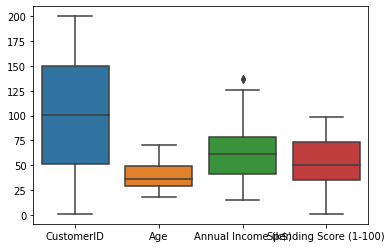

In [ ]:
sns.boxplot(data=df)

# ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df.Gender=le.fit_transform(df.Gender)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# DROPPING UNNECESSARY FEATURE

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

# FINDING THE BEST K VALUE

In [ ]:
lst=[]
for i in range(1,11):
  kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
  kmodel.fit(df)
  lst.append(kmodel.inertia_)

In [ ]:
lst

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75528.58656469136,
 58348.641363315044,
 51167.2466295748,
 44355.31351771351,
 40655.686213786204,
 37119.16974887127]

In [ ]:
len(lst)

10

ELBOW CURVE

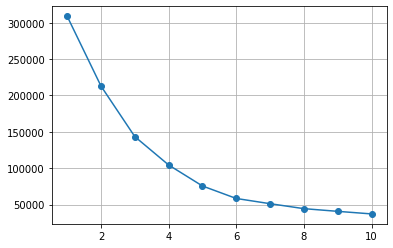

In [ ]:
plt.plot(range(1,11),lst,marker='o')
plt.grid()

In [ ]:
# we'll choose k = 5

In [ ]:
kmodel=KMeans(n_clusters=5)

# TRAINING

In [ ]:
kmodel.fit(df)

KMeans(n_clusters=5)

# TESTING

In [ ]:
prediction=kmodel.predict(df)

In [ ]:
kmodel.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [ ]:
df['clusters']=prediction

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,3
197,1,32,126,74,2
198,1,32,137,18,3


# PLOTTING THE PREDICTIONS

In [ ]:
from scipy.spatial import ConvexHull

(0.0, 100.0)

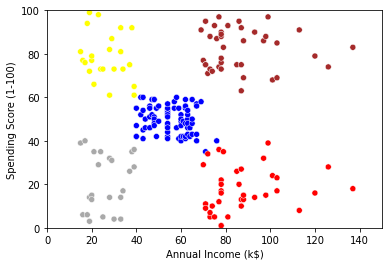

In [ ]:
color=np.array(['darkgrey','blue','brown','red','yellow','black'])
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=color[kmodel.labels_])
plt.xlim(0,150)
plt.ylim(0,100)

In [ ]:
kmodel.predict(df.iloc[0:1,0:4])

array([0], dtype=int32)

# DENDROGRAM VISUALIZATION

{'color_list': ['g',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',

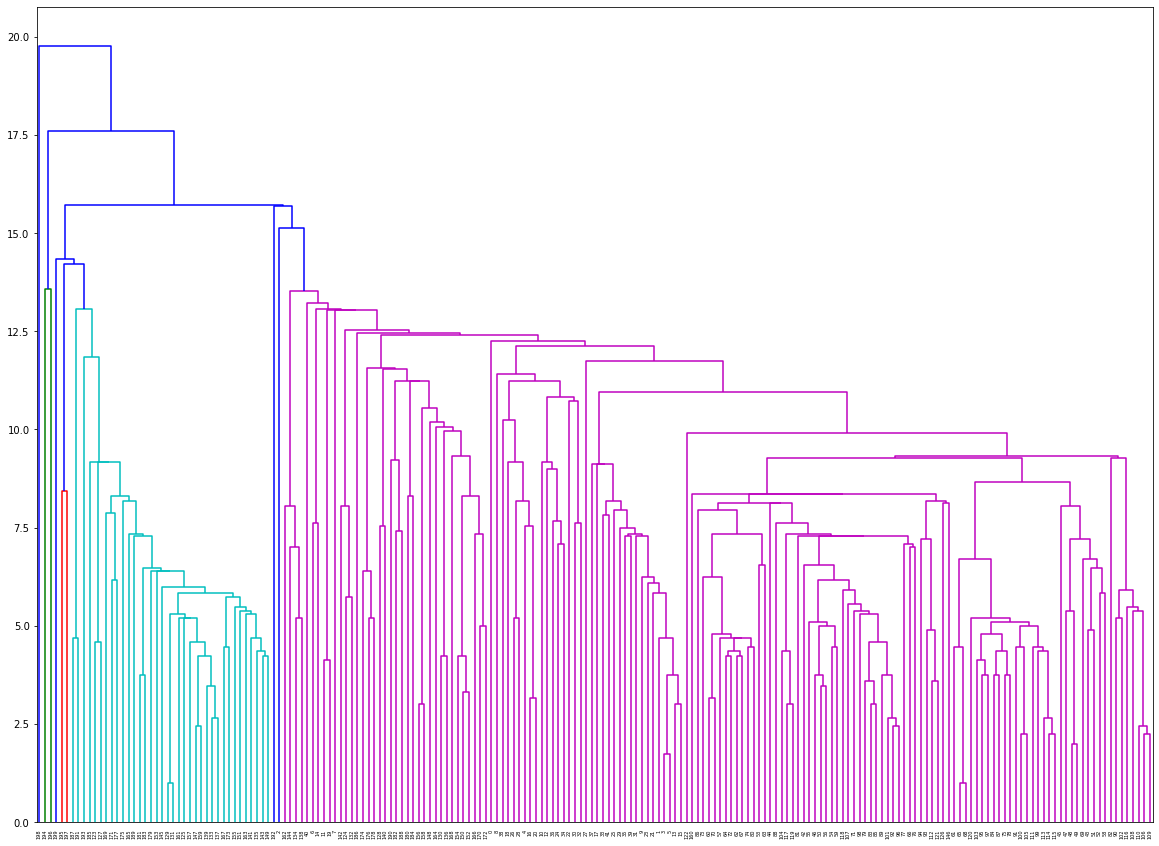

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram
var=linkage(df)
plt.figure(figsize=(20,15))
dendrogram(var)

# HEIRARCHICAL CLUSTERING FOR SAME DATA

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean')

In [ ]:
cluster.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

# EVALUATING THE MODEL

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
kmodel.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [ ]:
score = silhouette_score(df.iloc[:,:-1], kmodel.labels_, metric='euclidean')
print(f'score = {score}')

score = 0.4440669204743008


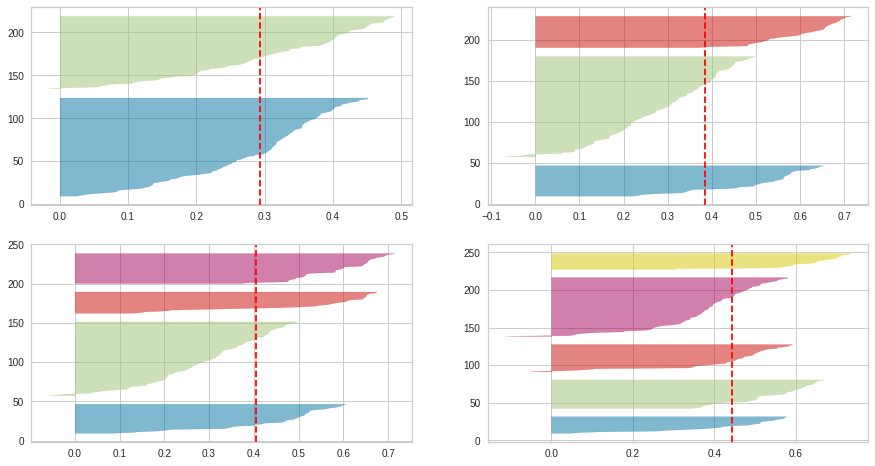

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df.iloc[:,:-1])

In [ ]:
#DUNN'S INDEX CALC
#from jqm_cvi import base
clus0 = df.loc[df.clusters == 0]
clus1 = df.loc[df.clusters == 1]
clus2 = df.loc[df.clusters == 2]
clus3 = df.loc[df.clusters == 3]
clus4 = df.loc[df.clusters == 4]
cluster_list = [clus0.values, clus1.values, clus2.values,clus3.values,clus4.values]
print(cluster_list)
#print(base.dunn(cluster_list))

[array([[ 1, 19, 15, 39,  0],
       [ 0, 20, 16,  6,  0],
       [ 0, 31, 17, 40,  0],
       [ 0, 35, 18,  6,  0],
       [ 1, 64, 19,  3,  0],
       [ 1, 67, 19, 14,  0],
       [ 0, 58, 20, 15,  0],
       [ 1, 37, 20, 13,  0],
       [ 0, 35, 21, 35,  0],
       [ 1, 52, 23, 29,  0],
       [ 1, 35, 24, 35,  0],
       [ 0, 46, 25,  5,  0],
       [ 0, 54, 28, 14,  0],
       [ 0, 45, 28, 32,  0],
       [ 0, 40, 29, 31,  0],
       [ 1, 60, 30,  4,  0],
       [ 1, 53, 33,  4,  0],
       [ 0, 49, 33, 14,  0],
       [ 0, 42, 34, 17,  0],
       [ 0, 36, 37, 26,  0],
       [ 0, 65, 38, 35,  0],
       [ 1, 48, 39, 36,  0],
       [ 0, 49, 39, 28,  0]]), array([[ 0, 50, 40, 55,  1],
       [ 0, 27, 40, 47,  1],
       [ 0, 29, 40, 42,  1],
       [ 0, 31, 40, 42,  1],
       [ 0, 49, 42, 52,  1],
       [ 1, 33, 42, 60,  1],
       [ 0, 31, 43, 54,  1],
       [ 1, 59, 43, 60,  1],
       [ 0, 50, 43, 45,  1],
       [ 1, 47, 43, 41,  1],
       [ 0, 51, 44, 50,  1],
       [ 1,

In [ ]:
!apt-get install git+https://github.com/jqmviegas/jqm_cvi.git 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package git+https://github.com/jqmviegas
E: Couldn't find any package by glob 'git+https://github.com/jqmviegas'
E: Couldn't find any package by regex 'git+https://github.com/jqmviegas'


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [ ]:
print(dunn(cluster_list))

0.06837190628574621


In [ ]:
#DB SCORE 
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(df.iloc[:,:-1], kmodel.labels_))

0.8222596417814187
